In [2]:
from __future__ import absolute_import, division, print_function

In [3]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [4]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
#IMPORT DESIRED TRAINED MODEL ON THE DOTS
thrones2vec = w2v.Word2Vec.load('trained/... .w2v')

In [7]:
#VISUALIZE THIS PART NEEDS TO BE DONE IN TERMINAL
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

all_word_vectors_matrix = thrones2vec.wv.syn0

#takes a bit longer because it needs to train again to make the figure. (max 10 min) 
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


In [8]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.wv.vocab[word].index])
            for word in thrones2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)
#plots column list
points.head(10)
len(points)


7900

In [8]:
sns.set_context("poster")

In [9]:
import matplotlib.pyplot as patches 
import matplotlib.pyplot
import matplotlib.patches 

from math import *
import math

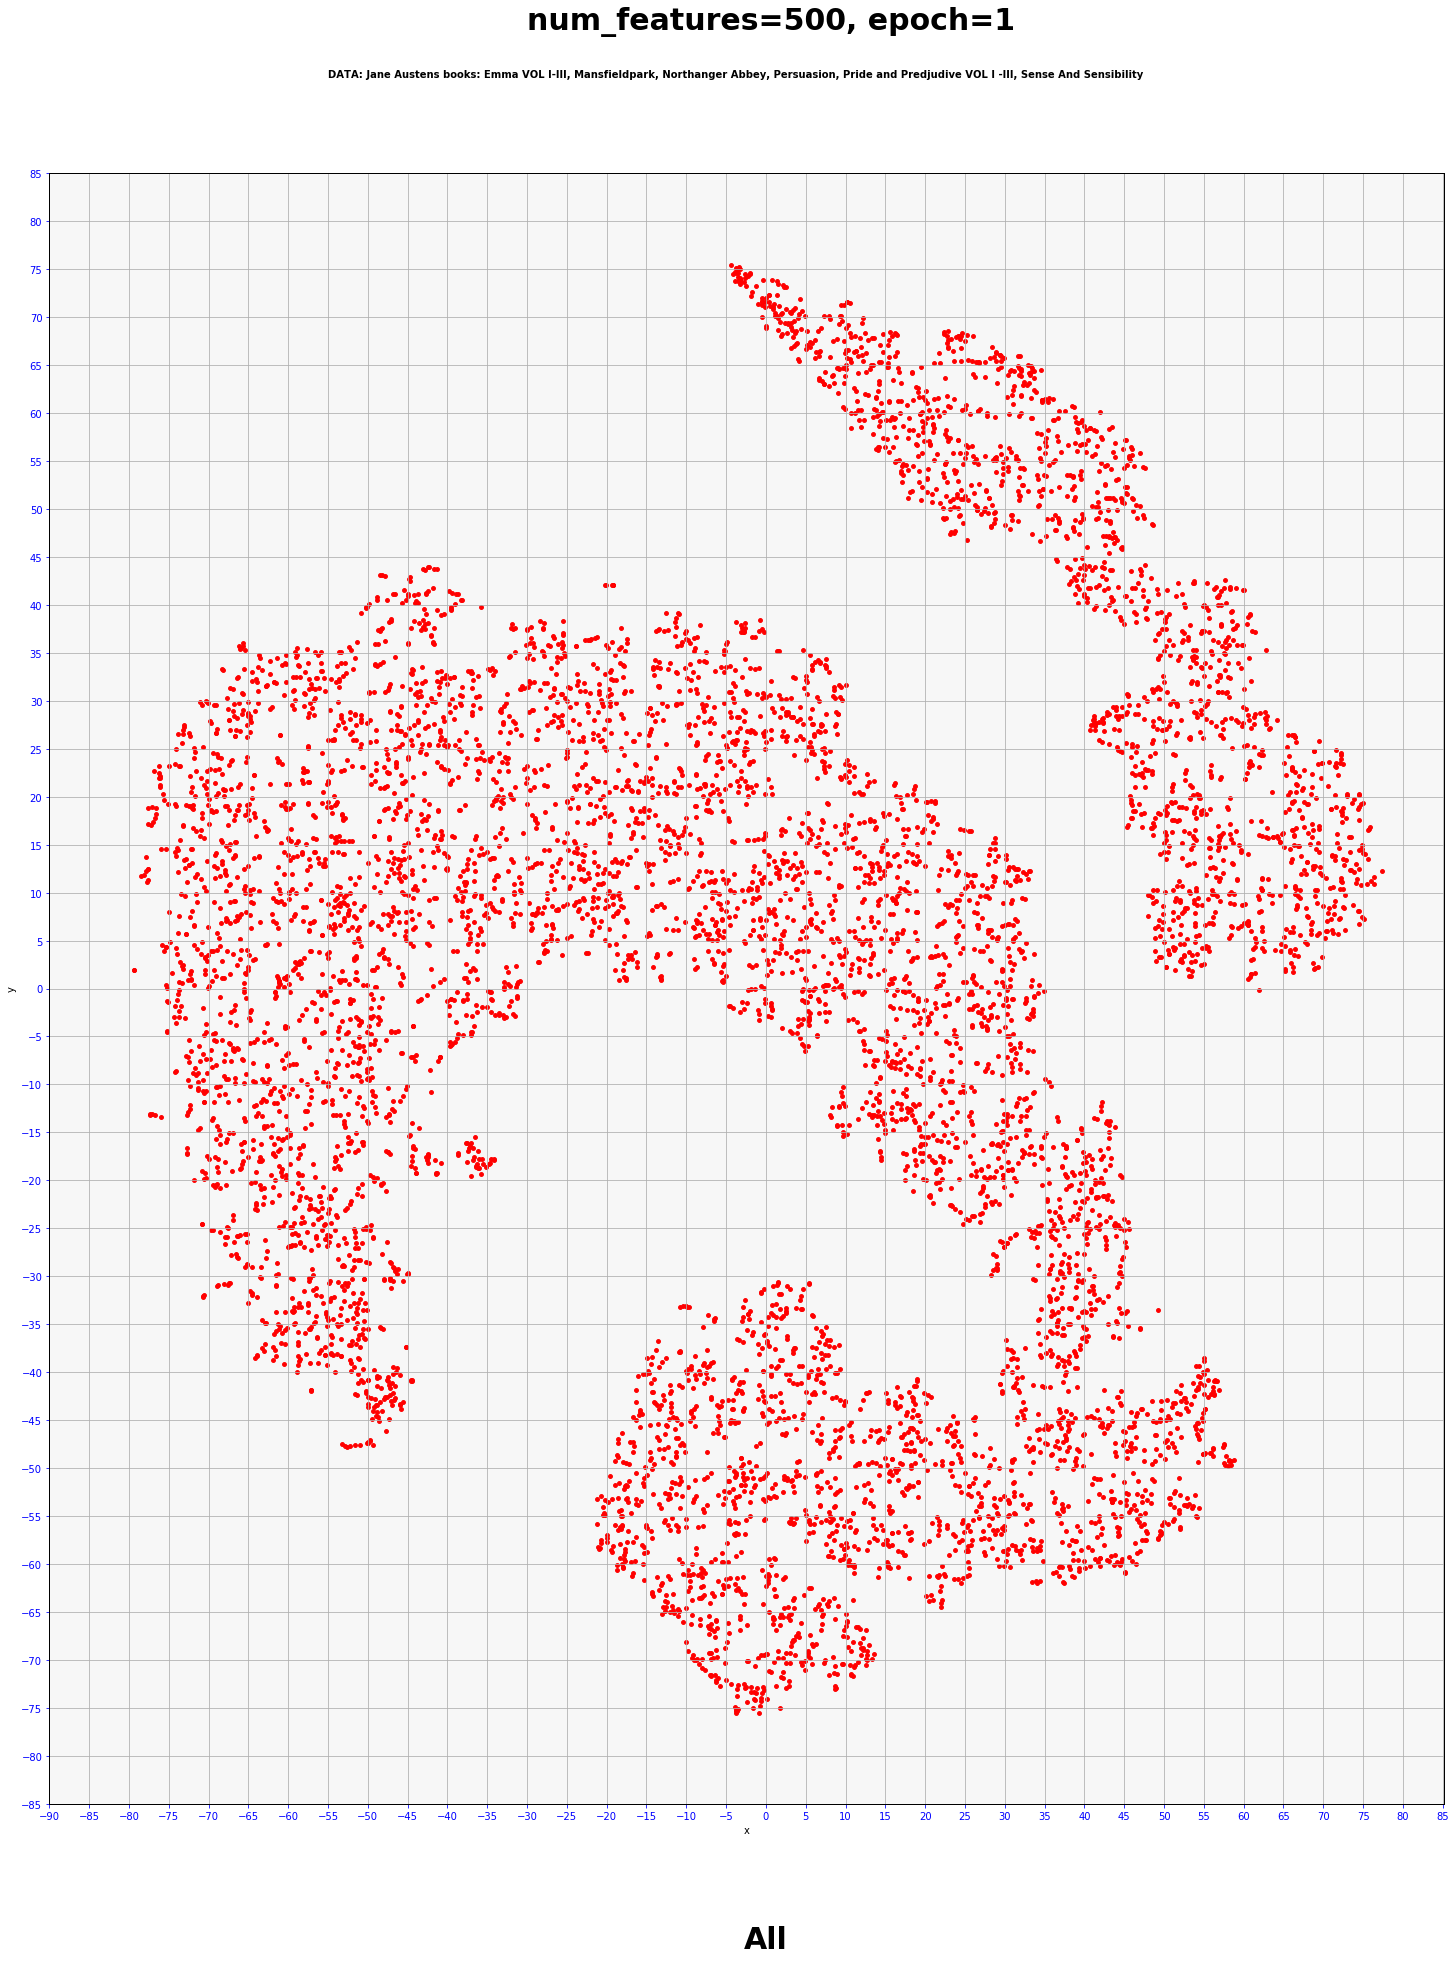

In [13]:
def conv(a):
    if a<0:
        a=int(math.ceil(a)-math.ceil(a)%5)
        return a    
    else:
        a=int(math.ceil(a)+math.ceil(a)%5)
        return a    

#Changing the dot color color="any color you want"
points.plot.scatter("x", "y", s=15,color="r", figsize=(25, 30),grid=True,zorder=1)
#changiing plot background color
gca().set_facecolor('#f7f7f7')

#Changing the axes interval
start, end = plt.xlim()
start1, end1 = plt.ylim()
plt.xticks(np.arange(conv(start), conv(end), 5))
plt.yticks(np.arange(conv(start1), conv(end1), 5))

#Top and Below Title
#PLOT TEXT WITH NUM_FEATURES AND EPOCH
#SET THE NUMBER
plt.text(-30,100,'num_features=number, epoch=number', fontsize=30, fontweight='bold')
plt.text(-55,95,'DATA: Jane Austens books: Emma VOL I-III, Mansfieldpark, Northanger Abbey, Persuasion, Pride and Predjudive VOL I -III, Sense And Sensibility ', fontsize=10, fontweight='bold')
plt.text(0, -100, "All", ha='center', fontsize=30, fontweight='bold')

#Changing the axes color
plt.tick_params(axis='x', colors='b')
plt.tick_params(axis='y', colors='b')

#Applying the yellow patch 
#rect = patches.Rectangle((0,0),0,0,linewidth=1,edgecolor='r',alpha=0.5,color='y',zorder=0)
#gca().add_patch(rect)

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

#SET NAME FOR PDF AND PNG FILE. 
savefig('fig.pdf')
savefig('fig.png')